<a href="https://colab.research.google.com/github/bjariwala/Project_2_Challenge/blob/main/UpdatedHWPRoject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import model_selection
import seaborn as sns

%matplotlib inline

In [ ]:
#from google.colab import files
#csv_file = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
#Read the Personal Loan database file
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
#See all the dtypes in the dataset for all the column. 
# We see that the  the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable 
# this should be in 'category' type.
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Checking for missing values there are no null values in our case
df.isnull().values.any()

False

In [ ]:
# Data Analysis
# Id just represnts orws and colums
# Zipcode If we are predicting customers from which area are accepting more personal loan then we need to consider this column.
# Experience has negative data and highly Correlated with age.
# We will be dropping the columns – ID ,Experience and ZIP Code.

df = df.drop(["ID","Experience","ZIP Code"],axis=1)
df.head()



,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
cor=df.corr()
cor

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


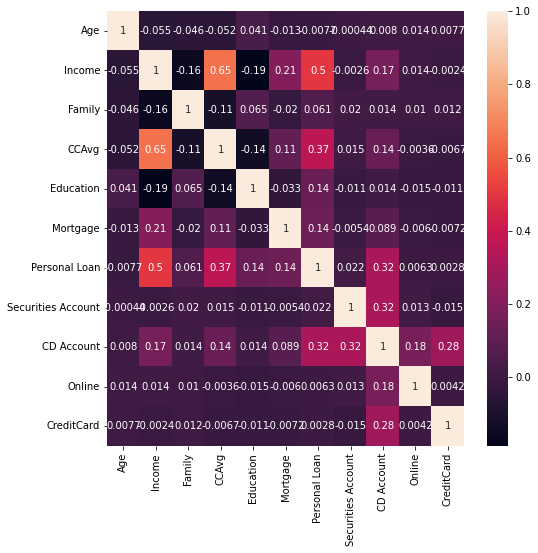

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(cor,annot=True)

In [ ]:
# Split the data into X an Y
y = df["Personal Loan"]
X = df.drop(['Personal Loan'], axis =1)
df['Personal Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

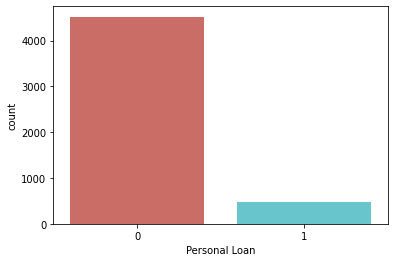

In [ ]:
# Target column 
sns.countplot(x ='Personal Loan', data=df, palette='hls')
plt.show()

In [ ]:
# Build our model
#Split the dataset to 70-30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)


(3500, 10)
(1500, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
# Fit the data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Score the accuracy
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.982


In [ ]:
predictions = rf_model.predict(X_test_scaled)

In [ ]:
cm_RF = confusion_matrix(y_test, predictions)
print("The Confusion Matrix is", cm_RF)

The Confusion Matrix is [[1346    5]
 [  22  127]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.96      0.85      0.90       149

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
#Model 2
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Initiate the model instance
lr_model = LogisticRegression()

In [ ]:
# Fit the model using the training data
model = lr_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = lr_model.predict(X_test_scaled)

# Score the accuracy
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")


Training Data Score: 0.9531428571428572
Testing Data Score: 0.9486666666666667


In [ ]:
cm_LR = confusion_matrix(y_test, predictions)
print("The Confusion Matrix is", cm_LR)

The Confusion Matrix is [[1346    5]
 [  22  127]]


In [ ]:
# Use a classification report to evaluate the model using the predictions and testing data
report = classification_report(pred, y_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1398
           1       0.58      0.85      0.69       102

    accuracy                           0.95      1500
   macro avg       0.79      0.90      0.83      1500
weighted avg       0.96      0.95      0.95      1500



In [ ]:
# Conclusion
# The goal is to compare between two models 1) Logistic Regression 2) Random Forest Classiifer for the Bank to convert liability customers into loan customers and set new marketing campaingn.
# We found that Random classifier model had the highest accuracy.